In [31]:
"""
This notebook is to prepare the data by spliting to training and the test sets and training the model using Session 1.
"""

'\nThis notebook is to prepare the data by spliting to training and the test sets and training the model using Session 1.\n'

In [32]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [33]:
!pip install pyWavelets

In [34]:
import os
import pandas as pd
import numpy as np
import scipy.io as sio
from scipy import signal
import matplotlib.pyplot as plt
import pywt
import cv2
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score


In [35]:
import gc


In [36]:
folder_path = os.getcwd()
X1 = np.load(r'/content/drive/MyDrive/AC_ToDrive/SER_project_session_images/Session1_images.npy')
#X2 = np.load(r'/content/drive/MyDrive/AC_ToDrive/SER_project_session_images/Session2_images.npy')
X3 = np.load(r'/content/drive/MyDrive/AC_ToDrive/SER_project_session_images/Session3_images.npy')
X4 = np.load(r'/content/drive/MyDrive/AC_ToDrive/SER_project_session_images/Session4_images.npy')
X5 = np.load(r'/content/drive/MyDrive/AC_ToDrive/SER_project_session_images/Session5_images.npy')

In [37]:
X = np.concatenate((X1, X3, X4, X5), axis=0)
print(np.shape(X))

(8228, 128, 128, 3)


In [38]:
y1 = pd.read_csv(r'/content/drive/MyDrive/AC_ToDrive/SER_project_true_labels/S1_true_labels.csv', index_col = 0)
#y2 = pd.read_csv(r'/content/drive/MyDrive/AC_ToDrive/SER_project_true_labels/S2_true_labels.csv', index_col = 0)
y3 = pd.read_csv(r'/content/drive/MyDrive/AC_ToDrive/SER_project_true_labels/S3_true_labels.csv', index_col = 0)
y4 = pd.read_csv(r'/content/drive/MyDrive/AC_ToDrive/SER_project_true_labels/S4_true_labels.csv', index_col = 0)
y5 = pd.read_csv(r'/content/drive/MyDrive/AC_ToDrive/SER_project_true_labels/S5_true_labels.csv', index_col = 0)


In [39]:
true_labels = pd.concat([y1, y3, y4, y5], ignore_index=True)
true_labels

,file_section_name,true_label
0,Ses01F_impro01_F000,neu
1,Ses01F_impro01_F001,neu
2,Ses01F_impro01_F002,neu
3,Ses01F_impro01_F003,xxx
4,Ses01F_impro01_F004,xxx
...,...,...
8223,Ses05M_script03_2_M041,ang
8224,Ses05M_script03_2_M042,ang
8225,Ses05M_script03_2_M043,ang
8226,Ses05M_script03_2_M044,ang


In [43]:
true_labels['true_label'] = true_labels['true_label'].replace('hap', 'exc')


In [44]:
true_labels.groupby(by='true_label').count()

,file_section_name
true_label,
ang,966
dis,2
exc,1309
fea,31
fru,1524
neu,1346
oth,2
sad,887
sur,90


In [45]:
drop_list = true_labels[true_labels['true_label'] == 'dis'].index.tolist() + true_labels[true_labels['true_label'] == 'oth'].index.tolist() + true_labels[true_labels['true_label'] == 'xxx'].index.tolist() + true_labels[true_labels['true_label'] == 'fea'].index.tolist() + true_labels[true_labels['true_label'] == 'sur'].index.tolist()

In [17]:
(drop_list)

[770,
 3041,
 685,
 5275,
 3,
 4,
 10,
 28,
 37,
 39,
 41,
 51,
 53,
 55,
 57,
 58,
 71,
 75,
 79,
 82,
 88,
 99,
 100,
 105,
 107,
 123,
 124,
 128,
 130,
 131,
 132,
 135,
 140,
 187,
 190,
 197,
 201,
 204,
 218,
 240,
 243,
 258,
 259,
 275,
 304,
 306,
 311,
 312,
 313,
 316,
 319,
 320,
 332,
 333,
 338,
 343,
 345,
 346,
 348,
 349,
 350,
 355,
 358,
 359,
 360,
 361,
 362,
 378,
 393,
 431,
 432,
 433,
 446,
 448,
 451,
 462,
 482,
 487,
 488,
 489,
 490,
 491,
 496,
 497,
 498,
 502,
 506,
 507,
 511,
 512,
 513,
 518,
 531,
 534,
 535,
 538,
 541,
 544,
 550,
 551,
 552,
 555,
 557,
 559,
 561,
 565,
 566,
 568,
 569,
 570,
 571,
 582,
 584,
 593,
 602,
 604,
 606,
 607,
 612,
 613,
 614,
 615,
 621,
 624,
 628,
 630,
 634,
 638,
 641,
 649,
 661,
 663,
 670,
 676,
 683,
 686,
 687,
 688,
 692,
 703,
 711,
 712,
 716,
 717,
 721,
 722,
 723,
 724,
 725,
 726,
 727,
 731,
 733,
 734,
 735,
 736,
 739,
 744,
 746,
 751,
 752,
 754,
 755,
 756,
 757,
 759,
 760,
 762,
 763,
 767

In [46]:
true_labels = true_labels.drop(drop_list)

In [47]:
dict = {}
for i, key in enumerate(true_labels['true_label'].unique().tolist()):
    dict[key] = i
def class_preprocessing(labels_df, dict):
    labels_df['num_label'] = labels_df['true_label'].map(dict)
    return labels_df

In [20]:
dict

{'neu': 0, 'fru': 1, 'ang': 2, 'sad': 3, 'hap': 4, 'exc': 5}

In [21]:
man_dict = {
    'ang': 0,
    'exc': 1,
    'hap': 2,
    'sad': 3,
    'fru':4,
    'neu': 5
}

In [48]:
true_labels = class_preprocessing(true_labels, dict)
true_labels

,file_section_name,true_label,num_label
0,Ses01F_impro01_F000,neu,0
1,Ses01F_impro01_F001,neu,0
2,Ses01F_impro01_F002,neu,0
5,Ses01F_impro01_F005,neu,0
6,Ses01F_impro01_F006,fru,1
...,...,...,...
8223,Ses05M_script03_2_M041,ang,2
8224,Ses05M_script03_2_M042,ang,2
8225,Ses05M_script03_2_M043,ang,2
8226,Ses05M_script03_2_M044,ang,2


In [49]:
true_labels.groupby('num_label').count()

,file_section_name,true_label
num_label,,
0,1346,1346
1,1524,1524
2,966,966
3,887,887
4,1309,1309


In [63]:
y = true_labels['num_label'].values

In [51]:
X = np.delete(X, drop_list, axis=0)  # Remove the row at index 770 from X

print(f"Shape of X after removal: {X.shape}")
print(f"Length of y after removal: {len(y)}")

Shape of X after removal: (6032, 128, 128, 3)
Length of y after removal: 6032


In [26]:
del X1, X3, X4, X5
del true_labels
del y1, y3, y4, y5


In [27]:
gc.collect()

31

In [75]:
unique, counts = np.unique(y_test, return_counts=True)
counts

array([202, 229, 145, 133, 196])

## Train Test split

In [84]:
X_train, X_remain, y_train, y_remain = train_test_split(X, y, train_size = 0.7, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_remain, y_remain, train_size = 0.5, random_state=42, stratify=y_remain)

In [21]:
del X, y
gc.collect()

0

In [78]:
print("Unique labels in y_train:", np.unique(y_val))
print("Unique labels in y_test:", np.unique(y_test))

Unique labels in y_train: [0 1 2 3 4]
Unique labels in y_test: [0 1 2 3 4]


In [79]:
## Initial training
from tensorflow.keras import layers, models
import tensorflow as tf
model = models.Sequential()
model.add(layers.BatchNormalization(input_shape=(128, 128, 3)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())

model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))

model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))

model.add(layers.Dense(len(dict), activation='softmax'))

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=3*1e-6), loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/normalization/batch_normalization.py:143: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [80]:
from tensorflow.keras.callbacks import ModelCheckpoint

# Define checkpoint callback to save the best model
checkpoint_callback = ModelCheckpoint(
    '/content/drive/MyDrive/AC_ToDrive/cwt_f2.keras',  # file path to save the model
    monitor='val_accuracy',  # metric to monitor
    save_best_only=True,  # only save when validation accuracy improves
    mode='max',  # maximize validation accuracy
    verbose=1
)

In [81]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, num_classes=len(dict))
y_test = to_categorical(y_test, num_classes=len(dict))
y_val = to_categorical(y_val, num_classes=len(dict))

In [82]:
np.shape(y_val)

(905, 5)

In [83]:
history = model.fit(X_train, y_train,validation_data=(X_val, y_val), epochs=100, batch_size=64, callbacks = [checkpoint_callback])
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc}')


Epoch 1/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step - accuracy: 0.2360 - loss: 1.6030
Epoch 1: val_accuracy improved from -inf to 0.25193, saving model to /content/drive/MyDrive/AC_ToDrive/cwt_f2.keras
66/66 ━━━━━━━━━━━━━━━━━━━━ 27s 292ms/step - accuracy: 0.2361 - loss: 1.6029 - val_accuracy: 0.2519 - val_loss: 1.6063
Epoch 2/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step - accuracy: 0.2654 - loss: 1.5904
Epoch 2: val_accuracy did not improve from 0.25193
66/66 ━━━━━━━━━━━━━━━━━━━━ 15s 220ms/step - accuracy: 0.2651 - loss: 1.5904 - val_accuracy: 0.2519 - val_loss: 1.6043
Epoch 3/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step - accuracy: 0.2486 - loss: 1.5879
Epoch 3: val_accuracy did not improve from 0.25193
66/66 ━━━━━━━━━━━━━━━━━━━━ 14s 219ms/step - accuracy: 0.2486 - loss: 1.5879 - val_accuracy: 0.2519 - val_loss: 1.6021
Epoch 4/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step - accuracy: 0.2523 - loss: 1.5818
Epoch 4: val_accuracy did not improve from 0.25193
66/66 ━━━━━━━━━━━━━━━━━━━━ 14

In [ ]:
model.save('/content/drive/MyDrive/AC_ToDrive/mel_spec_model.h5')

In [ ]:
del model
gc.collect()

17173

In [ ]:
test_loss, test_acc, test_auc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc}')

7/7 ━━━━━━━━━━━━━━━━━━━━ 13s 2s/step - AUC: 0.7559 - accuracy: 0.3281 - loss: 1.7610
Test accuracy: 0.33175355195999146


In [ ]:
def get_accuracy_metrics(model_, X_train, y_train, X_val, y_val, X_test, y_test):
  train_pred = model_.predict(X_train)
  val_pred = model_.predict(X_val)
  test_pred = model_.predict(X_test)


29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step


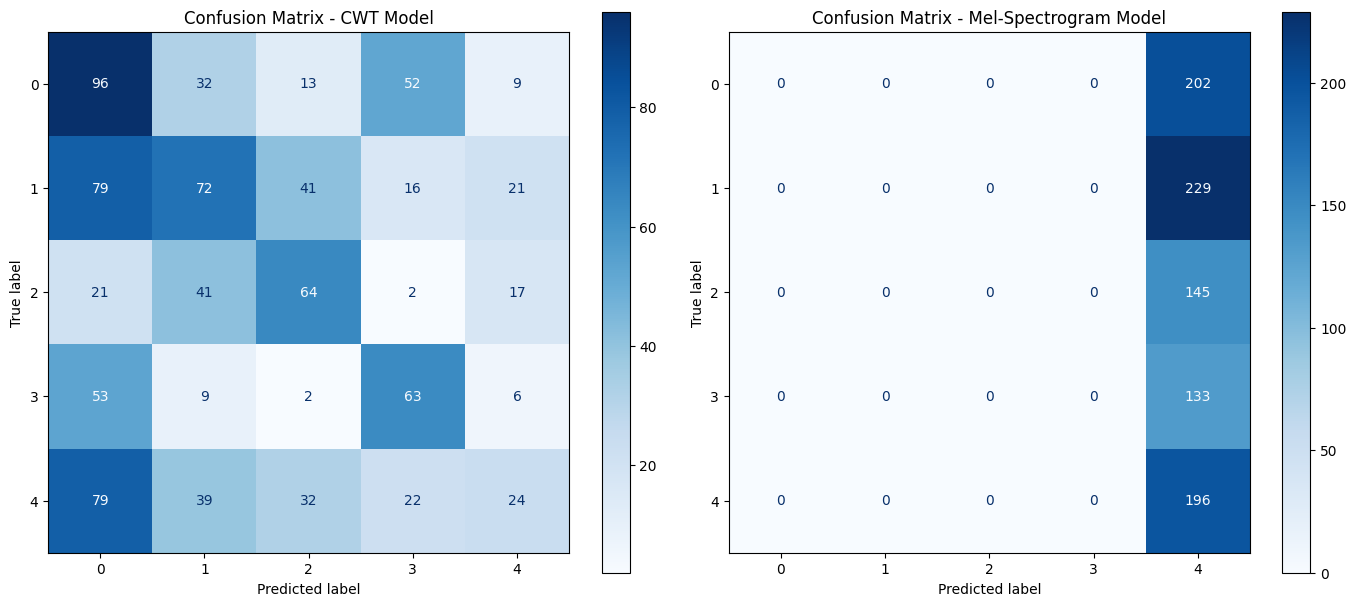

In [85]:
import tensorflow as tf
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Load the models
cwt_model = tf.keras.models.load_model('/content/drive/MyDrive/AC_ToDrive/cwt_f2.keras')
mel_spec_model = tf.keras.models.load_model('/content/drive/MyDrive/AC_ToDrive/mel_f1.keras')

# Assuming you have a test set of inputs (X_test) and ground truth labels (y_true)
# Replace these with your actual data.
# X_test = ...
# y_true = ...

# Generate predictions
y_pred_cwt = cwt_model.predict(X_test)
y_pred_mel = mel_spec_model.predict(X_test)

# Convert predictions to class labels
y_pred_cwt_classes = y_pred_cwt.argmax(axis=1)
y_pred_mel_classes = y_pred_mel.argmax(axis=1)

# Generate confusion matrices
cm_cwt = confusion_matrix(y_test, y_pred_cwt_classes)
cm_mel = confusion_matrix(y_test, y_pred_mel_classes)

# Plot confusion matrices side by side
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Plot for CWT model
ConfusionMatrixDisplay(cm_cwt).plot(ax=axs[0], cmap="Blues")
axs[0].set_title("Confusion Matrix - CWT Model")

# Plot for Mel-Spectrogram model
ConfusionMatrixDisplay(cm_mel).plot(ax=axs[1], cmap="Blues")
axs[1].set_title("Confusion Matrix - Mel-Spectrogram Model")

# Show the plots
plt.tight_layout()
plt.show()


In [61]:
dict

{'neu': 0, 'fru': 1, 'ang': 2, 'sad': 3, 'exc': 4}

KeyError: 'val_accuracy'

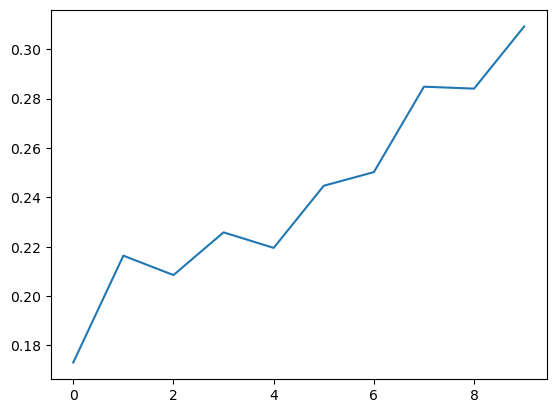

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
